In [3]:
import scipy.integrate
from scipy.integrate import odeint
import matplotlib
import matplotlib.pylab as plt
matplotlib.rcParams['figure.figsize'] = (6,3.75)
matplotlib.rcParams['savefig.dpi'] = 120
cs = 10**np.linspace(-8,-4,100)


In [4]:
# Parameters 
#Kdk=1.2
#Kdmg=0.1

MgATP=0.0003
Pi=0.000001
Ca=0.000005
MgADP=0.000001

#kf1=100000000.0  K1=1/KD0=1/0.0000091=K3 This value is more reasonable
#kb1=400.0   
kf2=30.0
kb2=40.0
#kf3=400000000.0
#kb3=16.0
kf4=20000000.0
kb4=40.0
kf5=15.0
kb5=75000.0
kf6=250.0
kb6=270000.0

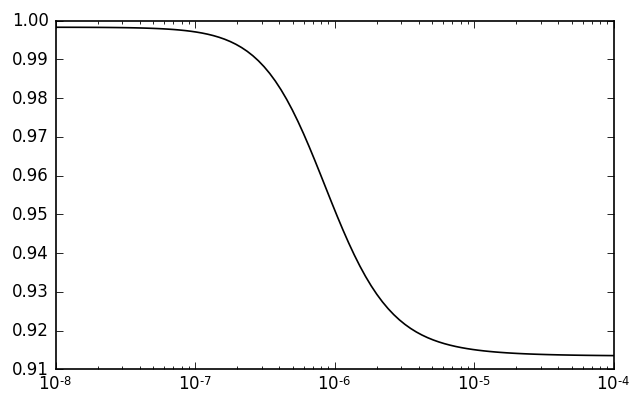

In [8]:

#  Saturation probability of E1'2Ca


# Linear Case,
def linearcase(Ca,kf2,kb2):
    K1=1/0.0000091 #the dissociation constant for Ca2+ in E1 state
    K3=1/0.0000091
    
    K2=kf2/kb2
    #K3=kf3/kb3
    
    demon= Ca*Ca*K1*K2*K3+Ca*K1*K2+Ca*K1+1
    nom = Ca*Ca*K1*K2*K3
    return nom/demon


vlinear = np.vectorize(linearcase)
#--------------------------------------------
#  Only Ca2+ involved in the model (non-linear)
#-------------------------------------------
def OnlyCa_P(Ca,kf2,kb2,kf4,kb4,kf5,kb5,kf6,kb6,MgATP,MgADP,Pi):
    
    Cai=0.000001
    K1=1/0.0000091 #the dissociation constant for Ca2+ in E1 state
    #K1=250000
    K3=1/0.0000091
    Kd=0.0000024 #the dissociation constant for Ca2+ in E2 state
    K2=kf2/kb2
    K4=kf4/kb4
    
    af1=kf5*K1*K2*K3*K4*Ca*Ca*MgATP/(1+K1*Ca+K1*K2*Ca+K1*K2*K3*Ca*Ca+K1*K2*K3*K4*Ca*Ca*MgATP)
    ab1=kb5*MgADP/(1+Kd/Cai+Kd*Kd/(Cai*Cai))
    af2=(kf6*Kd*Kd/(Cai*Cai))/(1+(Kd/Cai)+Kd*Kd/(Cai*Cai))
    ab2=kb6*Pi/(1+K1*Ca+K1*K2*Ca+K1*K2*K3*Ca*Ca+K1*K2*K3*K4*Ca*Ca*MgATP)

    
    return (af2+ab1)/(af2+af1+ab2+ab1)
   

vOnlyCa_P = np.vectorize(OnlyCa_P)

#-------------------------------------
# Mg and K are inhibitors of SERCA
#------------------------------------

def MgKin_P(Ca,Mg,Kdmg,K,Kdk,kf2,kb2):
    K1=1/0.0000045 #the dissociation constant for Ca2+ in E1 state
    K3=1/0.0000045
    
    K2=kf2/kb2
    
    demon=Mg/(Ca*Ca*Kdmg*K1*K2*K3)+1/(Ca*Ca*K1*K2*K3)+1/(Ca*K2*K3)+1/(Ca*K3)+1+K/(Ca*Ca*Kdk*K1*K2*K3) 

    return 1/demon

vMgKin_P=np.vectorize(MgKin_P)

plt.plot(cs,vOnlyCa_P(cs,kf2,kb2,kf4,kb4,kf5,kb5,kf6,kb6,MgATP,MgADP,Pi),"k-",label="only Ca2+")
#plt.plot(cs,vlinear(cs,kf2,kb2),"r-",label="only Ca2+")
#plt.plot(cs,vMgKin_P(cs,0.002,0.1,0.15,1.2,kf2,kb2),"b.",label="Kdmg=0.1,Kdk=1.2")
#plt.plot(cs,vMgKin_P(cs,0.002,10,0.15,100,kf2,kb2),"r.",label="Kdmg=0.1,Kdk=1.2")
#ylim([0,1])
xscale('log')

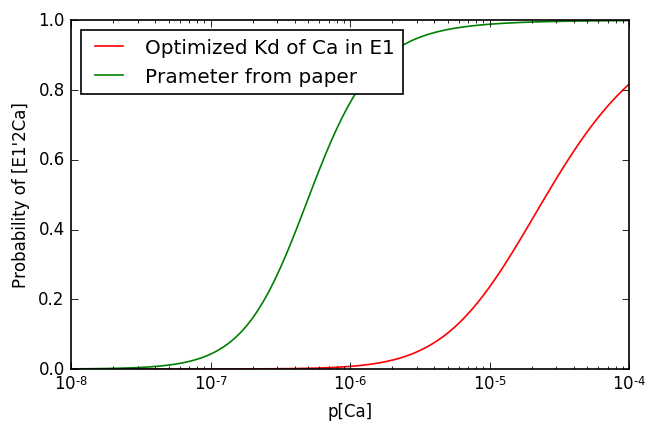

In [15]:
kf1=100000000.0 
kb1=400.0 
kf3=400000000.0
kb3=16.0
def Olinearcase(Ca,kf1,kb1,kf2,kb2,kf3,kb3):
    K1=kf1/kb1 
    K3=kf3/kb3
    
    K2=kf2/kb2
    #K3=kf3/kb3
    
    demon= Ca*Ca*K1*K2*K3+Ca*K1*K2+Ca*K1+1
    nom = Ca*Ca*K1*K2*K3
    return nom/demon


vOlinear = np.vectorize(Olinearcase)

plt.plot(cs,vlinear(cs,kf2,kb2),"r-",label="Optimized Kd of Ca in E1")
plt.plot(cs,vOlinear(cs,kf1,kb1,kf2,kb2,kf3,kb3),"g-",label="Prameter from paper")
xscale('log')
plt.legend(loc=2)
plt.xlabel("p[Ca]")
plt.ylabel("Probability of [E1'2Ca]")

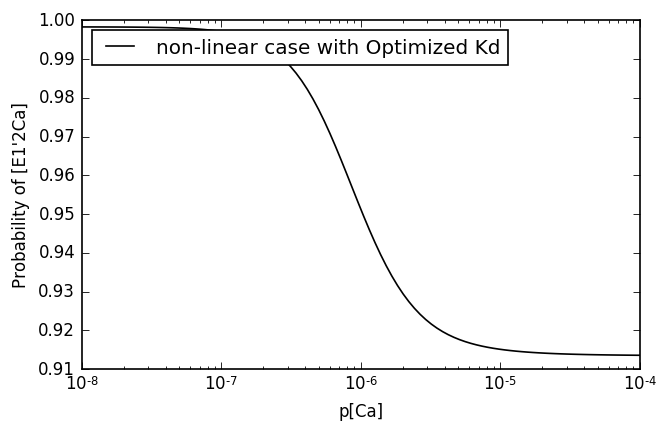

In [18]:
plt.plot(cs,vOnlyCa_P(cs,kf2,kb2,kf4,kb4,kf5,kb5,kf6,kb6,MgATP,MgADP,Pi),"k-",label="non-linear case with Optimized Kd")
xscale('log')
plt.legend(loc=2)
plt.xlabel("p[Ca]")
plt.ylabel("Probability of [E1'2Ca]")